In [60]:
import matplotlib as mpl

fsize = 20
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (16,10)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import datetime
import re

460.57000000000005
30980


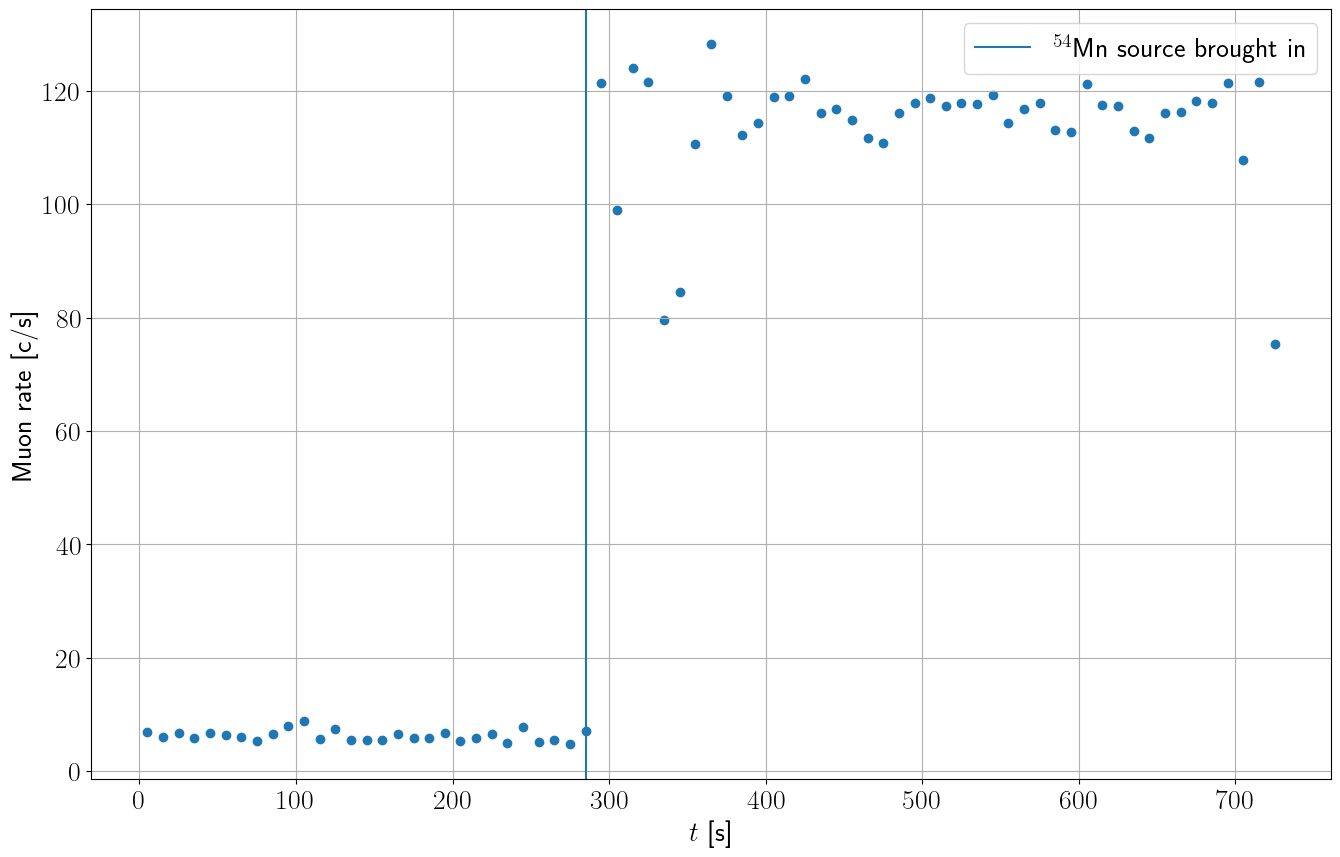

In [61]:
fname = "CW_power_measurements.txt"
data = np.genfromtxt(fname, delimiter="\t", dtype=[('t', int), ('ADC_val', int), ('Dead_t', int)], usecols=[2,3,7], skip_header=1).T
#, dtype=[('t', int), ('Dead_t', int)], usecols=[3,8]
#data = np.genfromtxt(fname+".TXT", skip_header=6).swapaxes(0,1)

Ardn_time = data['t']/1000 #s
Deadtime = data['Dead_t']/1000 #s

t0 = Ardn_time[0]
tf = Ardn_time[-1]

#dt = 0.1065 #s
dt = 10

bins = np.arange(t0, tf+dt, dt)

histogram, _ = np.histogram(Ardn_time, bins=bins)

Deadtime_per_bin = np.zeros_like(bins[0:-1])

prev_events = 0
events = 0
for c in range(len(histogram)):
	if c == 0:
		events = histogram[c]-1
		Deadtime_per_bin[c] = Deadtime[events]
	else:
		events = sum(histogram[0:c+1])-1
		Deadtime_per_bin[c] = Deadtime[events] - Deadtime[prev_events]

	prev_events = events

#rate = [c/((dt-Dt)) for c, Dt in zip(histogram, Deadtime_per_bin)]
rate = [c/dt for c in histogram]

#print(rate)

bin_num = len(bins)-1
t = np.arange(t0+dt/2, t0+dt/2+dt*bin_num, dt)

#t = t/(1000*60*60) #tiempo medido en horas

#takeoff_t = 2+(46/60)+(27/(60*50))
#kingston_t = 3+(54/60)+(11/(60*50))
#landing_t = 5+(53/60)+(32/(60*50))
#finish_t = 6+(40/60)+(0/(60*50))

color = plt.cm.rainbow(np.linspace(0, 1, 3))

plt.scatter(t, rate)

#plt.axvline(x=takeoff_t, label="takeo ff, Miami", color=color[0])
#plt.axvline(x=kingston_t, label="Kingston, Jamaica", color=color[1])
#plt.axvline(x=landing_t, label="landing, Bogotá", color=color[2])
#plt.axvline(x=finish_t)

measure_t0 = tf-266
measure_t0_idx = int(measure_t0/dt)

print(measure_t0)
#print(len(Ardn_time)-measure_t0_idx)
print(sum(histogram[measure_t0_idx:]))

source_index = None
for r in range(len(rate)):
	if rate[r+1]-rate[r] > 50:
		source_index = r
		break

plt.axvline(x=t[source_index], label=r'$^{54}$Mn source brought in')

plt.xlabel(r"$t$ [s]")
plt.ylabel("Muon rate [c/s]")

#plt.title(fname)

plt.legend()

plt.grid()

plt.savefig("count_rate.pdf", bbox_inches="tight")

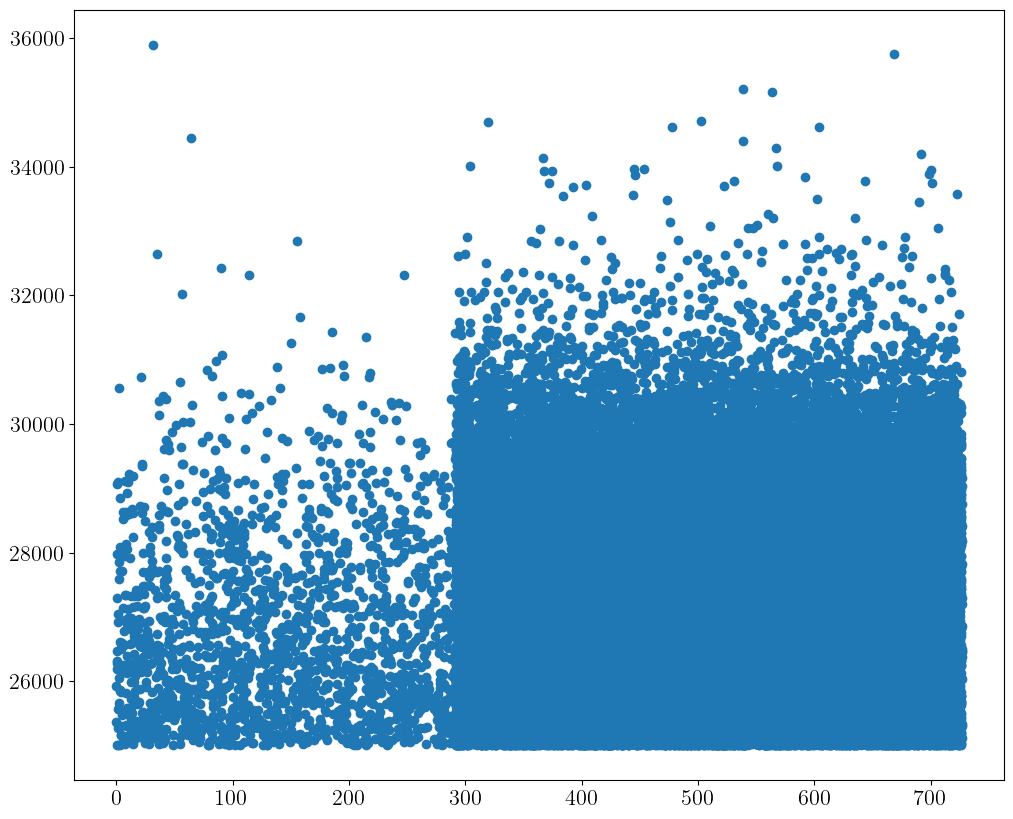

In [24]:
plt.scatter(Ardn_time, data['ADC_val'])
#plt.xscale(value='log')